In [ ]:
## Data 
https://drive.google.com/uc?id=1O5fQvg0TsjH5uRlIHNxt-WByTg4SRfwI

In [19]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\pima-indians-diabetes.csv', header=1, names=col_names)

In [20]:
df.head(4)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1


In [47]:
#Check Data how it Spread, wheather it contain imbalanced data or balanced data
df.label.value_counts()

0    500
1    267
Name: label, dtype: int64

In [23]:
# define dependent(Y) and Independent(X) Varibles
feature_cols = ['pregnant','glucose', 'bp', 'skin', 'insulin', 'bmi', 'age']
X = df[feature_cols]
y = df.label

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=1)

In [26]:
# Build and Train a logistic regression model on the training set(X_train, y_train)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# make class predictions On the testing set
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

Calculate accuracy on test data

In [41]:
# Our model predicted the result now we need to compair with our actural true
from sklearn import metrics
print("Model Accuracy :", round(metrics.accuracy_score(y_test, y_pred), 2)) 
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test, y_pred))

Model Accuracy : 0.75
Confusion Metrics :
[[96 12]
 [27 19]]


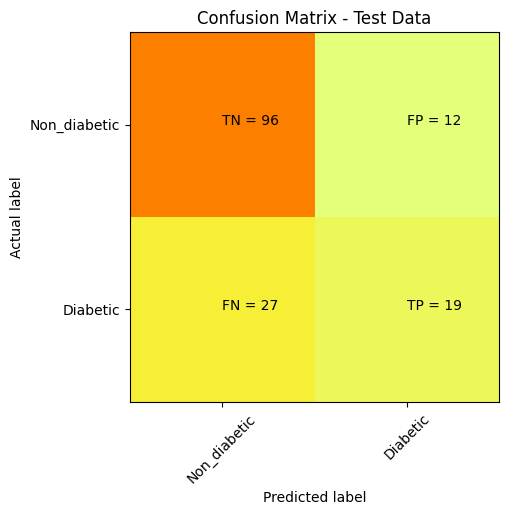

In [48]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [56]:
#Here we will find out precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = 2*precision*recall/(precision+recall)
print("precision :", round(precision, 2))
print("Recall :", round(recall, 2))
print("F1-Score :", round(f1_score, 2))

precision : 0.61
Recall : 0.41
F1-Score : 0.49


In [57]:
#predict_proba method that returns the class probabilities for each data point.
logreg.predict_proba(X_test)

array([[0.36700084, 0.63299916],
       [0.9307545 , 0.0692455 ],
       [0.5026926 , 0.4973074 ],
       [0.94097385, 0.05902615],
       [0.86249647, 0.13750353],
       [0.52142759, 0.47857241],
       [0.9515985 , 0.0484015 ],
       [0.71190149, 0.28809851],
       [0.67785276, 0.32214724],
       [0.99020456, 0.00979544],
       [0.54019351, 0.45980649],
       [0.99621695, 0.00378305],
       [0.93725765, 0.06274235],
       [0.89327553, 0.10672447],
       [0.91583518, 0.08416482],
       [0.71393939, 0.28606061],
       [0.6512335 , 0.3487665 ],
       [0.69193868, 0.30806132],
       [0.90299675, 0.09700325],
       [0.88747439, 0.11252561],
       [0.99015647, 0.00984353],
       [0.54965943, 0.45034057],
       [0.5794186 , 0.4205814 ],
       [0.68318979, 0.31681021],
       [0.88879919, 0.11120081],
       [0.93025028, 0.06974972],
       [0.95275583, 0.04724417],
       [0.9662259 , 0.0337741 ],
       [0.93214949, 0.06785051],
       [0.08282751, 0.91717249],
       [0.

In [63]:
#from sklearn.preprocessing import binarize
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_class = np.where(y_pred_prob>0.3, 1, 0) #if y_pred_prob > 0.3 return 1 else 0
y_pred_class

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [64]:
#since we have change our probability to 0.3 let check for precision, recall & f1-score
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1_score = 2*precision*recall/(precision+recall)
print("precision :", round(precision, 2))
print("Recall :", round(recall, 2))
print("F1-Score :", round(f1_score, 2))

precision : 0.51
Recall : 0.72
F1-Score : 0.59


In [65]:
#change the probability to 0.7
y_pred_class = np.where(y_pred_prob>0.7,1, 0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1_score = 2*precision*recall/(precision+recall)
print("precision :", round(precision, 2))
print("Recall :", round(recall, 2))
print("F1-Score :", round(f1_score, 2))

precision : 0.92
Recall : 0.26
F1-Score : 0.41


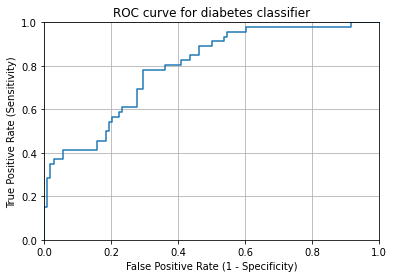

In [40]:

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [41]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7932769726247987
